# TP 4 : données manquantes, détection d'outliers, prédiction de RUL

Dans ce TP, nous travaillerons avec le même genre de données que précédemment, mais cette fois-ci, elles auront été dégradées pour traiter les problématiques proposées.

In [1]:
import pathlib
import numpy as np
import pandas as pd

In [28]:
## les fichiers à uploader sont les suivants (on les trouve dans TP4_inputs)
files = ['ANR.csv','FOG.csv','HGH.csv']

# 1 Gestion des données manquantes


1.1. lire les fichiers avec pandas et les concatener.

In [29]:
df_anr = pd.read_csv(files[0])
df_fog = pd.read_csv(files[1])
df_hgh = pd.read_csv(files[2])

df = pd.concat([df_anr, df_fog, df_hgh], axis=0)

 1.2 Affichez les types des variables du DataFrame et quelques valeurs. Que constatez-vous ?

In [30]:
# Afficher quelques valeurs par colonne
print("\nQuelques valeurs par colonne :")
for column in df.columns:
    print(f"\nColonne: {column}")
    print(f"Type: {df[column].dtype}")
    print("Valeurs:", df[column].head(5).tolist())


Quelques valeurs par colonne :

Colonne: AC_REG
Type: int64
Valeurs: [3, 3, 3, 3, 3]

Colonne: CYCLE
Type: int64
Valeurs: [1, 2, 3, 4, 5]

Colonne: TEMP_C°
Type: float64
Valeurs: [19.9998, 20.0071, 25.0071, 19.9982, 0.0003]

Colonne: HUMID_REL_PC(%)
Type: float64
Valeurs: [0.7013, 0.7012, 0.6213, 0.7, 0.0]

Colonne: THRUST_PC(%)
Type: object
Valeurs: ['0%', '0%', '80%', '0%', '100%']

Colonne: S0D_TMP_SN
Type: object
Valeurs: ['491.19', '491.19', '462.54', '491.19', '518.67']

Colonne: S0D_TMP_S2N
Type: float64
Valeurs: [607.76, 607.88, 536.61, 607.72, 642.1]

Colonne: S0D_FLP_S3N
Type: float64
Valeurs: [1486.02, 1479.31, 1258.63, 1486.79, 1593.3]

Colonne: S0D_TMP_S4N
Type: float64
Valeurs: [1257.26, 1248.52, 1051.53, 1256.06, 1408.28]

Colonne: S0D_WHL_S5N
Type: object
Valeurs: ['9,35', '9,35', '7,05', '9,35', '14,62']

Colonne: S0D_WHL_S6N
Type: float64
Valeurs: [13.65, 13.66, 9.02, 13.66, 21.61]

Colonne: S0D_FLP_S7N
Type: object
Valeurs: ['334.39', '334.46', '174.93', '334.63', '

Beaucoup de données manquantes et de types différents.

1.3 Etablisser un dictionnaire des valeurs qui vous semblent devoir être équivalente à NaN. Remplacez les par `np.nan` pour faciliter les traitements.
Vous pouvez faire l'hypothèse que les NaN ne commencent pas par un chiffre.

In [31]:
uniques = set([
    str(value)
    for f in list(df)
    for value in df[f].unique()
    if str(value)[0] not in "0123456789"
])
print("candidats : ", uniques)

na_dict = [
    "...",
    "/",
    "na",
    "nan",
    "no data",
]
print("filtrage manuel : ", na_dict)

df.replace(na_dict, np.nan, inplace=True)

candidats :  {'-99999.0', 'na', 'no data', 'HGH', '...', 'ANR', 'PPO', 'AAD', 'FOG', '/', 'nan', 'GGH', 'FLO'}
filtrage manuel :  ['...', '/', 'na', 'nan', 'no data']


Les experts métiers nous renseignent que les colonnes suivantes sont numériques :
````python
[
    'AC_REG',
     'CYCLE',
     'TEMP_C°',
     'HUMID_REL_PC(%)',
     'THRUST_PC(%)',
     'S0D_TMP_SN',
     'S0D_TMP_S2N',
     'S0D_FLP_S3N',
     'S0D_TMP_S4N',
     'S0D_WHL_S5N',
     'S0D_WHL_S6N',
     'S0D_FLP_S7N',
     'S0D_WHL_S8N',
     'S0D_WHL_S9N',
     'S1D_TMP_S0N',
     'S1D_TMP_S1N',
     'S1D_FLP_S2N',
     'S1D_FLP_S3N',
     'S1D_TMP_S4N',
     'S1D_PRS_S5N',
     'S1D_PRS_S6N',
     'S1D_TMP_S7N',
     'S1D_TMP_S8N',
     'S1D_TMP_S9N',
     'S2D_PRS_S0N',
     'S2D_PRS_S1N',
     'TEMP_N21',
     'TEMP_N23',
     'TEMP_N32'
]
````
1.4 Utilisez cette connaissance pour corriger les problèmes de types dans le jeu de données.

In [35]:
num_cols = [
    'AC_REG',
     'CYCLE',
     'TEMP_C°',
     'HUMID_REL_PC(%)',
     'THRUST_PC(%)',
     'S0D_TMP_SN',
     'S0D_TMP_S2N',
     'S0D_FLP_S3N',
     'S0D_TMP_S4N',
     'S0D_WHL_S5N',
     'S0D_WHL_S6N',
     'S0D_FLP_S7N',
     'S0D_WHL_S8N',
     'S0D_WHL_S9N',
     'S1D_TMP_S0N',
     'S1D_TMP_S1N',
     'S1D_FLP_S2N',
     'S1D_FLP_S3N',
     'S1D_TMP_S4N',
     'S1D_PRS_S5N',
     'S1D_PRS_S6N',
     'S1D_TMP_S7N',
     'S1D_TMP_S8N',
     'S1D_TMP_S9N',
     'S2D_PRS_S0N',
     'S2D_PRS_S1N',
     'TEMP_N21',
     'TEMP_N23',
     'TEMP_N32'
     ]

for col in num_cols:
    df[col] = df[col].replace(na_dict, np.nan).astype(float)

print("\nQuelques valeurs par colonne :")
for column in num_cols:
    print(f"\nColonne: {column}")
    print(f"Type: {df[column].dtype}")
    print("Valeurs:", df[column].head(5).tolist())


Quelques valeurs par colonne :

Colonne: AC_REG
Type: float64
Valeurs: [3.0, 3.0, 3.0, 3.0, 3.0]

Colonne: CYCLE
Type: float64
Valeurs: [1.0, 2.0, 3.0, 4.0, 5.0]

Colonne: TEMP_C°
Type: float64
Valeurs: [19.9998, 20.0071, 25.0071, 19.9982, 0.0003]

Colonne: HUMID_REL_PC(%)
Type: float64
Valeurs: [0.7013, 0.7012, 0.6213, 0.7, 0.0]

Colonne: THRUST_PC(%)
Type: float64
Valeurs: [0.0, 0.0, 80.0, 0.0, 100.0]

Colonne: S0D_TMP_SN
Type: float64
Valeurs: [491.19, 491.19, 462.54, 491.19, 518.67]

Colonne: S0D_TMP_S2N
Type: float64
Valeurs: [607.76, 607.88, 536.61, 607.72, 642.1]

Colonne: S0D_FLP_S3N
Type: float64
Valeurs: [1486.02, 1479.31, 1258.63, 1486.79, 1593.3]

Colonne: S0D_TMP_S4N
Type: float64
Valeurs: [1257.26, 1248.52, 1051.53, 1256.06, 1408.28]

Colonne: S0D_WHL_S5N
Type: float64
Valeurs: [9.35, 9.35, 7.05, 9.35, 14.62]

Colonne: S0D_WHL_S6N
Type: float64
Valeurs: [13.65, 13.66, 9.02, 13.66, 21.61]

Colonne: S0D_FLP_S7N
Type: float64
Valeurs: [334.39, 334.46, 174.93, 334.63, 553.25

1.5 Visualisez la fréquence des données manquantes, commentez.

In [39]:
# Compter les valeurs manquantes par colonne
missing_values_count = df.isnull().sum()

print("Nombre de valeurs manquantes par colonne :")
print(missing_values_count)

Nombre de valeurs manquantes par colonne :
AC_REG               0
CYCLE                0
TEMP_C°              0
HUMID_REL_PC(%)      0
THRUST_PC(%)         0
S0D_TMP_SN         709
S0D_TMP_S2N        638
S0D_FLP_S3N        667
S0D_TMP_S4N        643
S0D_WHL_S5N        916
S0D_WHL_S6N        950
S0D_FLP_S7N        911
S0D_WHL_S8N        592
S0D_WHL_S9N        693
S1D_TMP_S0N        700
S1D_TMP_S1N        669
S1D_FLP_S2N        875
S1D_FLP_S3N        689
S1D_TMP_S4N        839
S1D_PRS_S5N        675
S1D_PRS_S6N        856
S1D_TMP_S7N        655
S1D_TMP_S8N        791
S1D_TMP_S9N        916
S2D_PRS_S0N        576
S2D_PRS_S1N        596
S1D_TMP_S43N       875
S34D_TMP_SN        700
S2D_PGHS_S1N       675
S0D_RRP_S2N        667
HOP_FLP_S7N        791
TEMP_N21             0
TEMP_N23             0
TEMP_N32             0
Company              0
dtype: int64


1.6 Visualisez la position des Nans en utilisant le paquet missingno. Que voyez vous ?

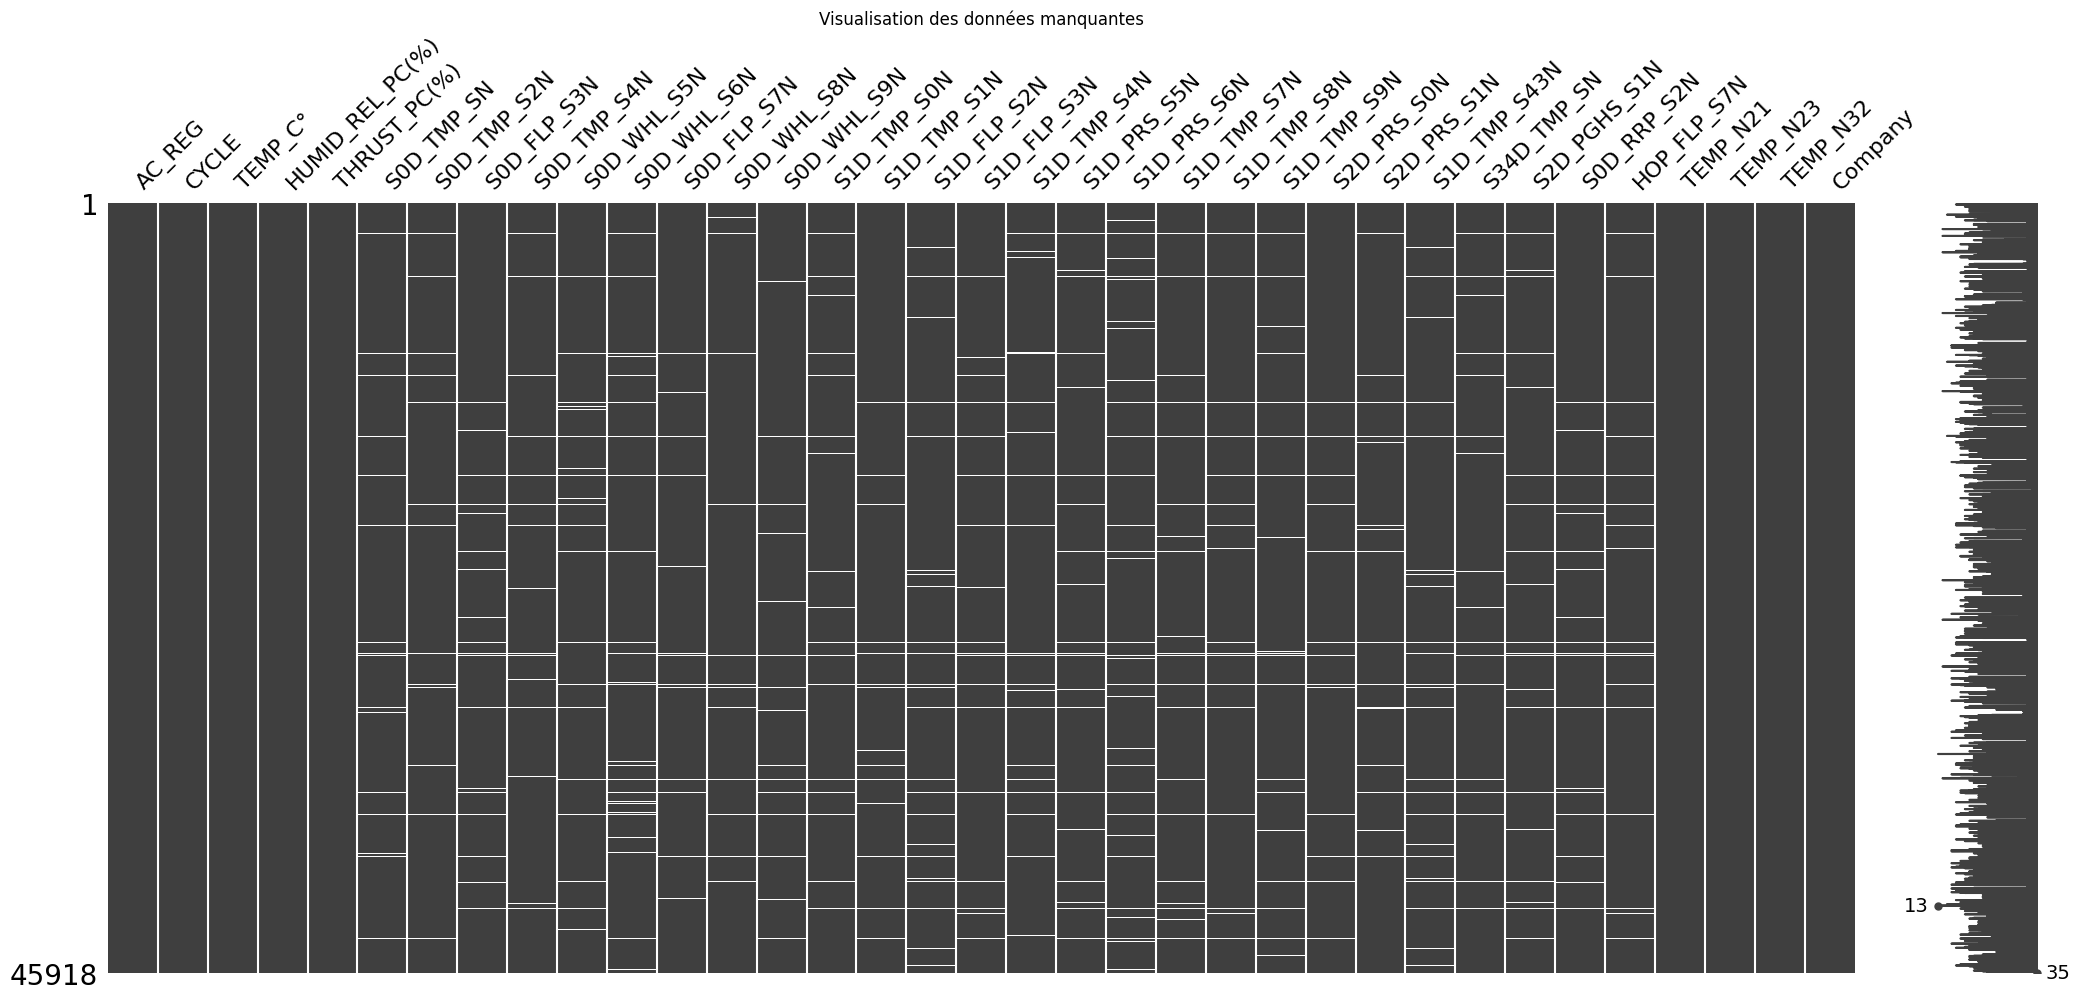

In [43]:
import missingno as msno 
import matplotlib.pyplot as plt

msno.matrix(df)
plt.title('Visualisation des données manquantes')
plt.show()

1.7 Retirer les NaN values. Combien de données avez-vous retiré ? Commentez.

In [51]:
rows_before = df.shape[0]

# Retirer les lignes avec des NaN
df_cleaned = df.dropna()

# Nombre de lignes après suppression
rows_after = df_cleaned.shape[0]

# Calculer le nombre de lignes retirées
rows_removed = rows_before - rows_after

# Calculer le pourcentage de lignes retirées
percentage_removed = (rows_removed / rows_before) * 100

print(f"Nombre de lignes retirées : {rows_removed}")
print(f"Pourcentage de lignes retirées : {percentage_removed:.2f}%")

Nombre de lignes retirées : 5607
Pourcentage de lignes retirées : 12.21%


# 2 Détection d'outliers
2.1 Utilisez Isolation Forest pour détecter les outliers dans les données numériques. Illustrez vos résultats.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

list_numeric = list()
for k in df_cleaned.keys():
    if df_cleaned[k].dtype != "object":
        list_numeric.append(k)

# Appliquer Isolation Forest
iso_forest = IsolationForest(n_estimators=500, contamination=0.1, random_state=42)
df_cleaned.loc[:, "_isoutlier"] = iso_forest.fit_predict(np.array(df_cleaned.loc[:, list_numeric]))

print(f"anomaly percent : {100*(df_cleaned.loc[:, "_isoutlier"]==-1).mean()} %")


anomaly percent : 9.99975192875394 %


2.2 Utilisez une détection par quantiles pour trouver des outliers (utilisez la méthode basées sur l'écart interquantile IQR). Commentez.

C:\Users\simon\AppData\Local\Temp\ipykernel_20884\552510892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["_isoutlier_q"] = ((df_cleaned.loc[:, list_numeric] < (q1 - 1.5 * IQR)) | (df_cleaned.loc[:, list_numeric] > (q3 + 1.5 * IQR))).sum(axis=1)


1.8120860311081342


c:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


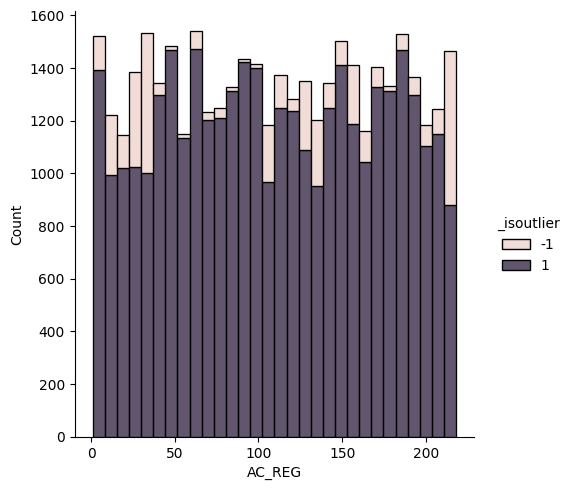

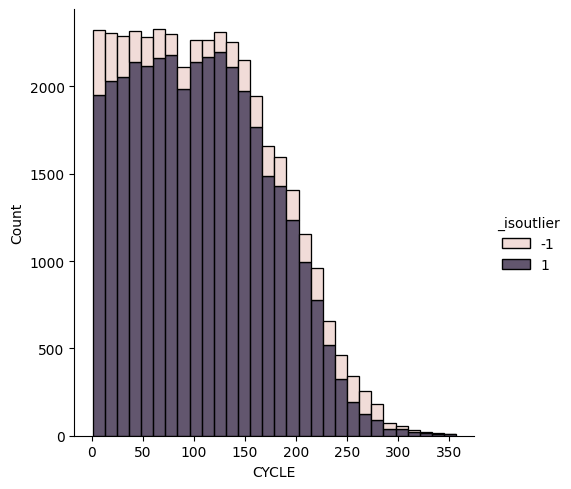

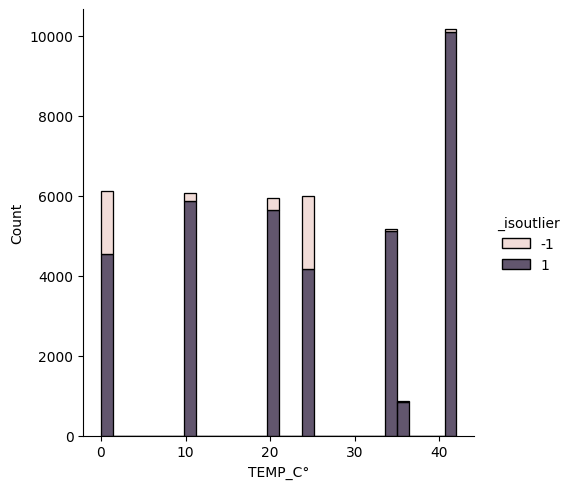

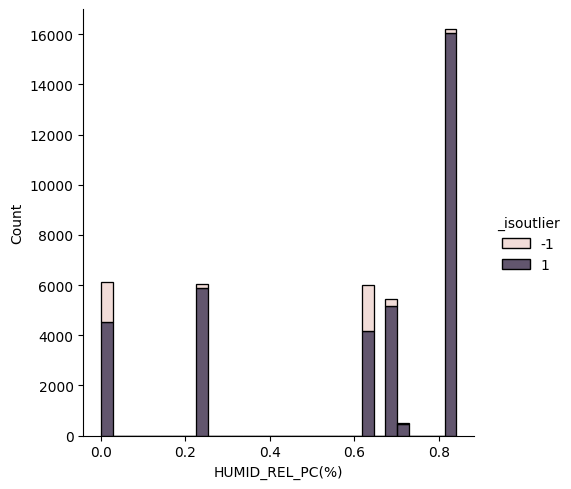

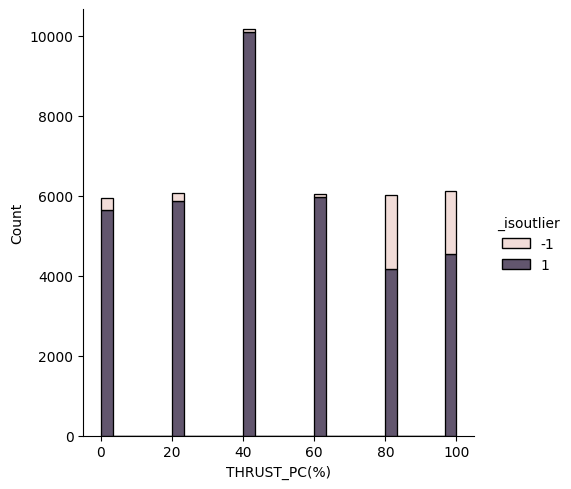

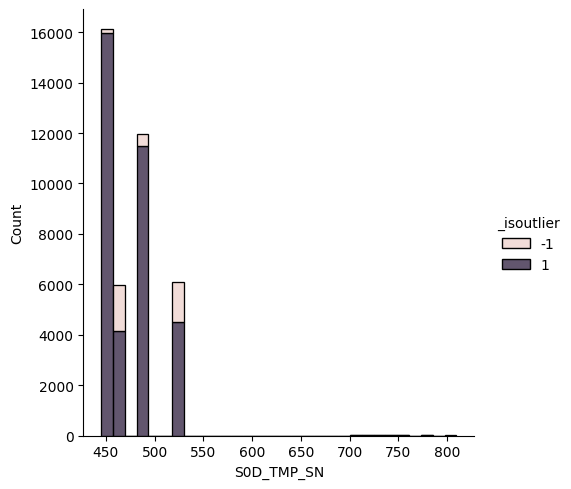

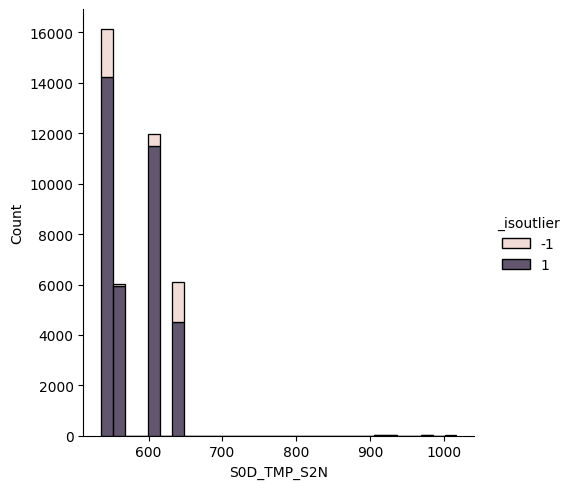

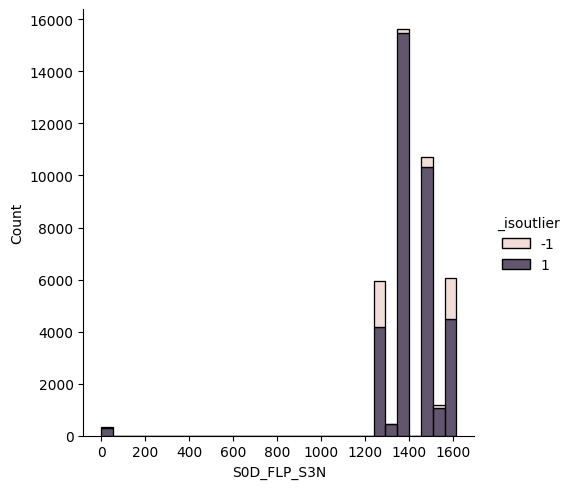

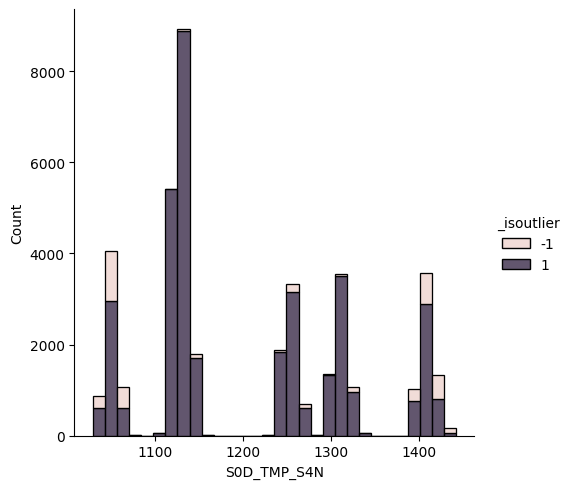

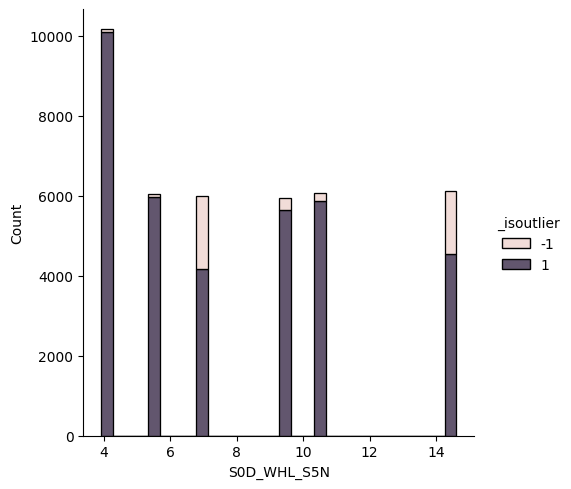

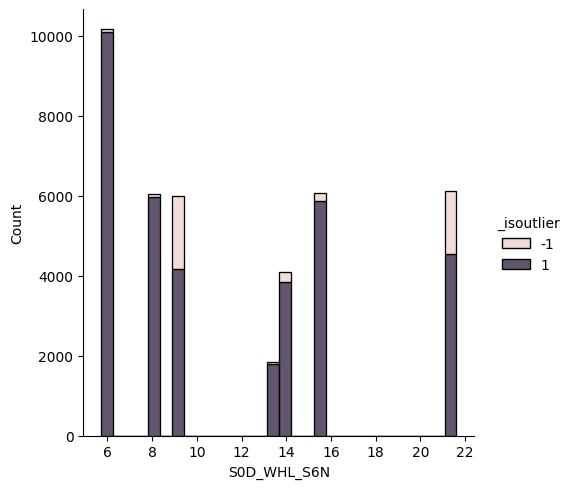

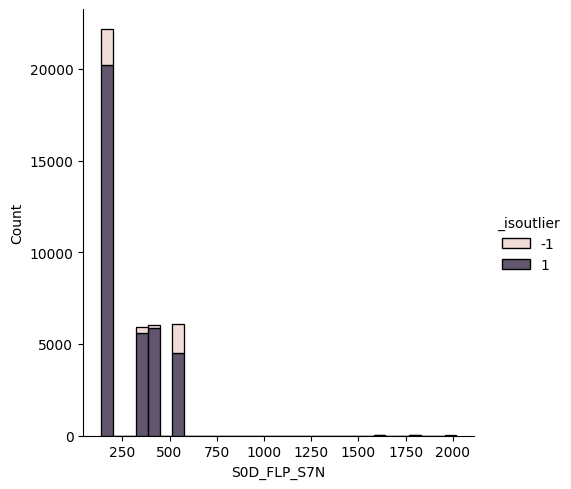

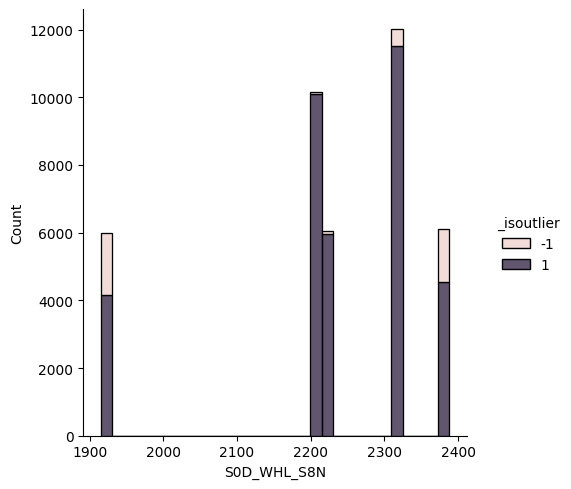

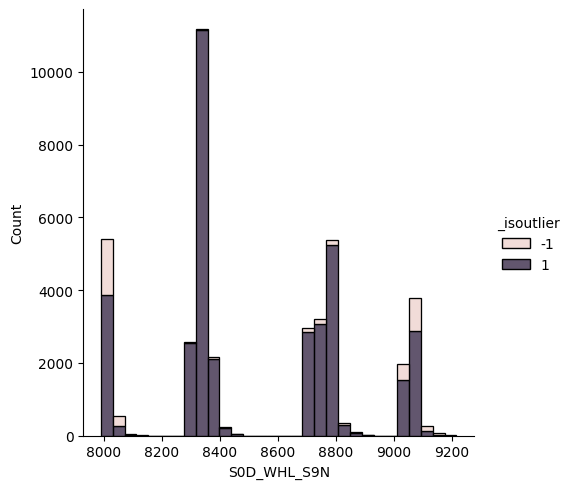

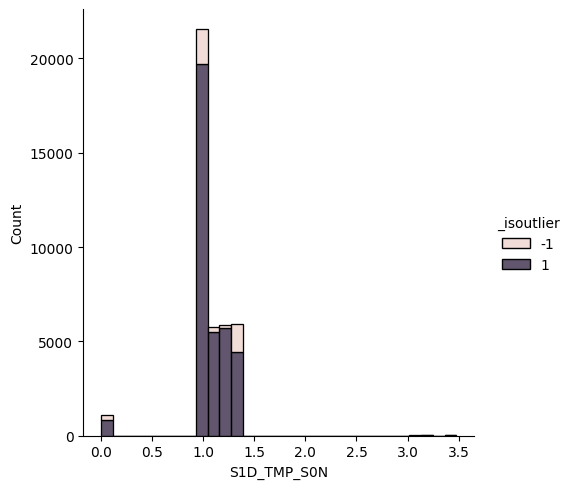

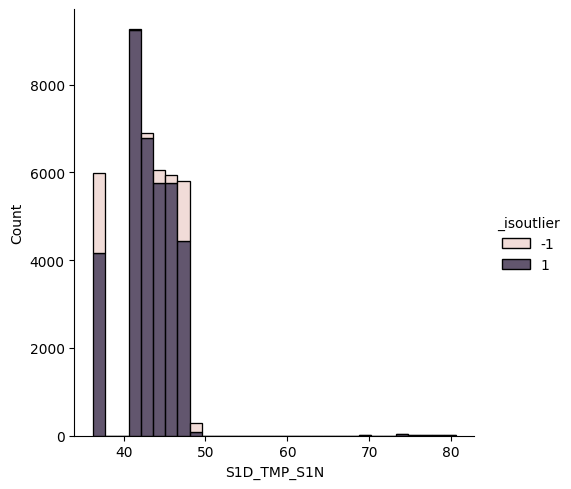

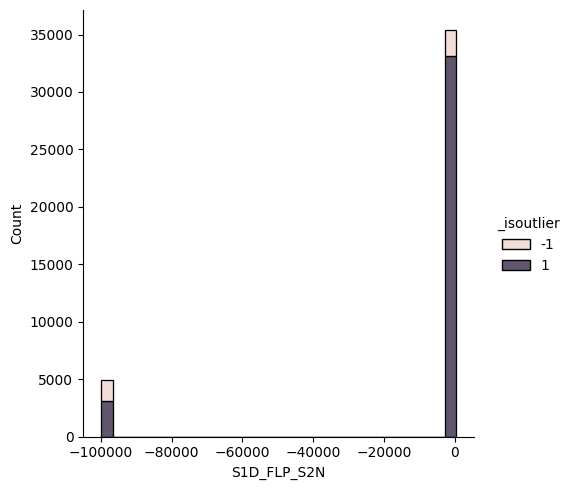

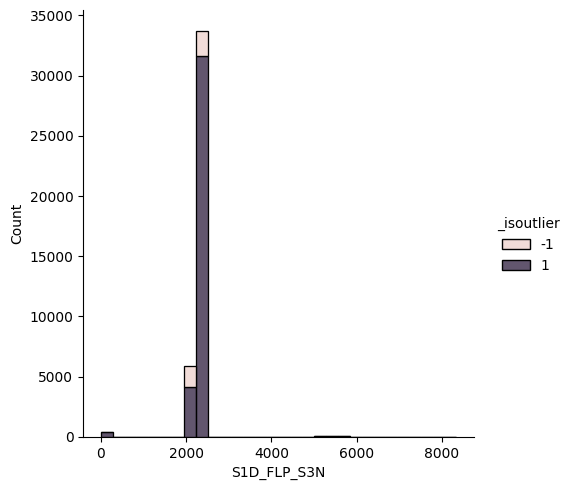

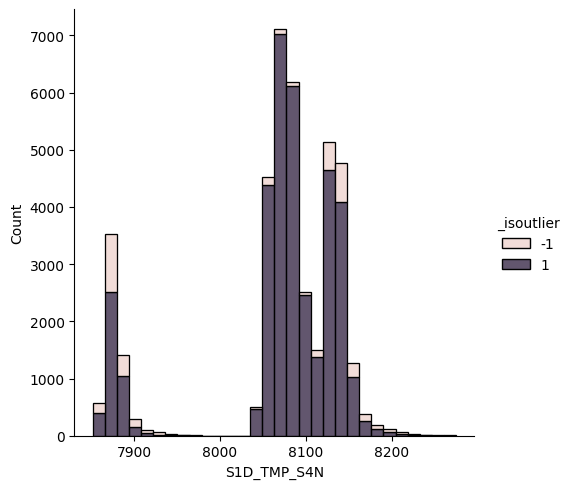

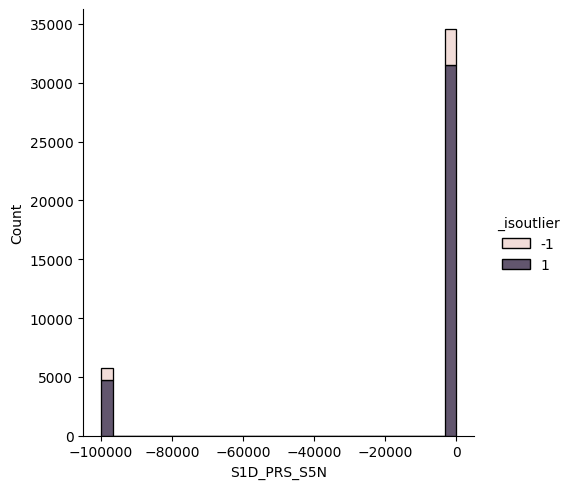

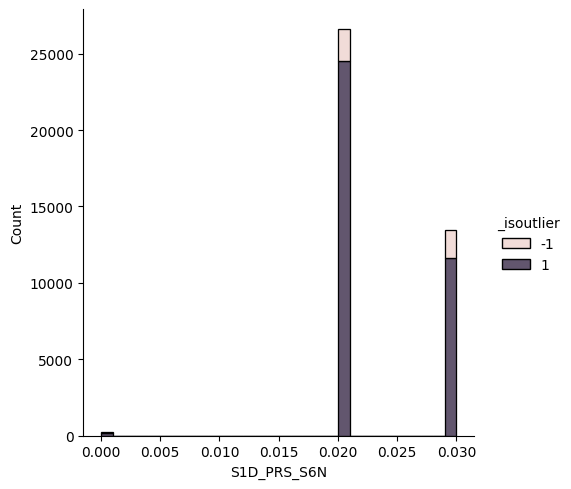

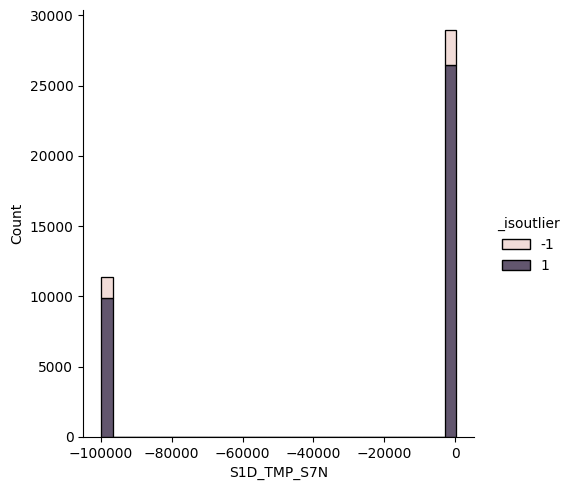

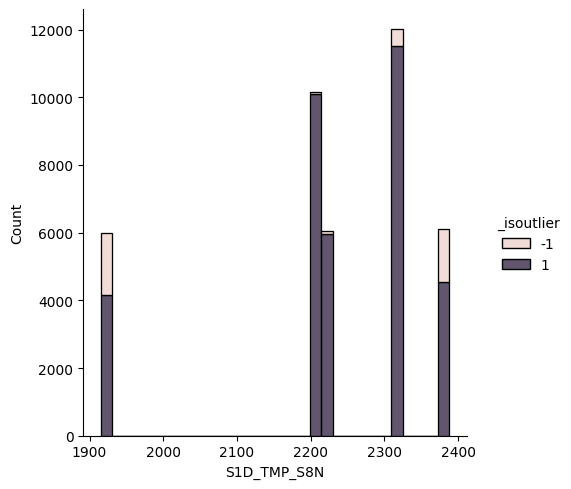

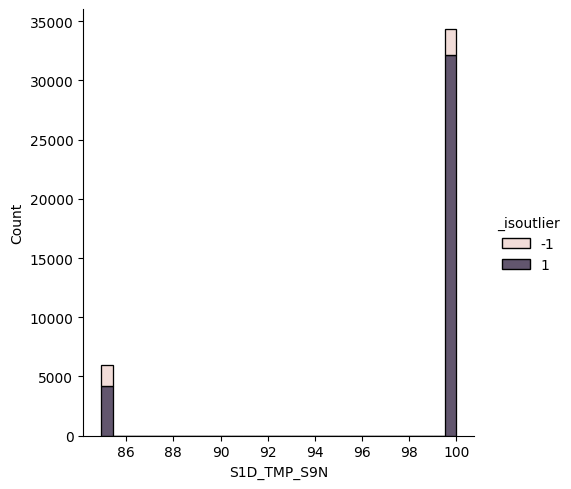

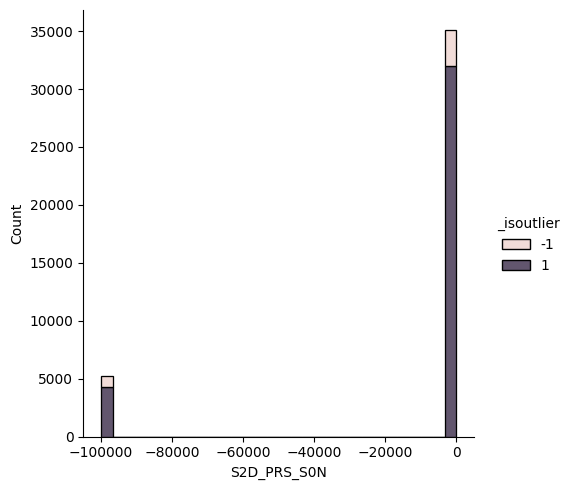

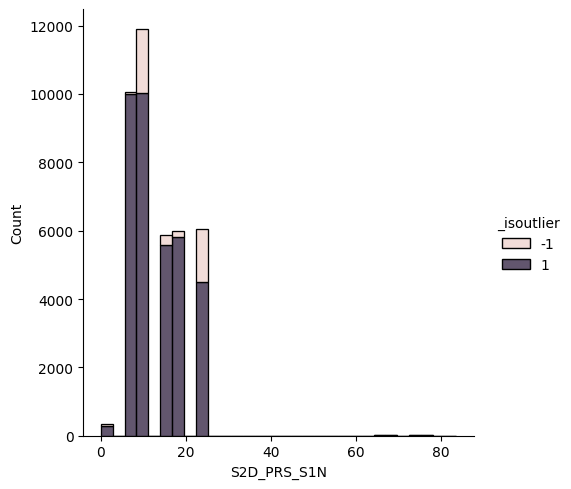

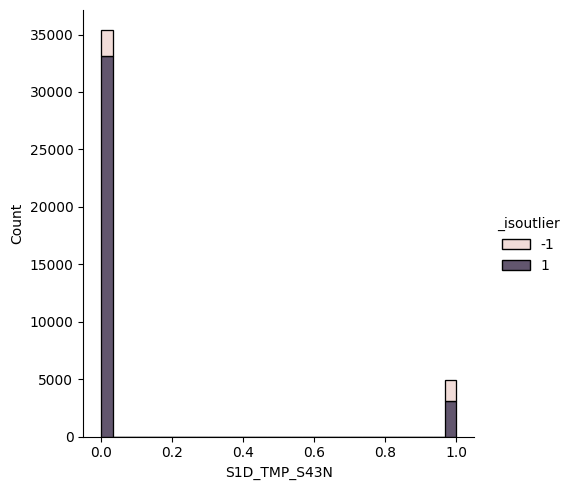

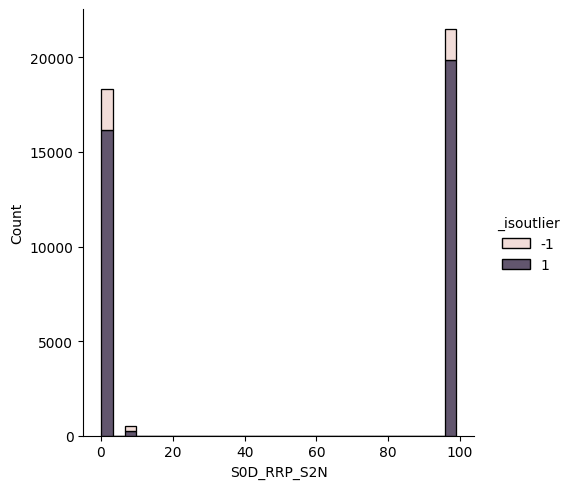

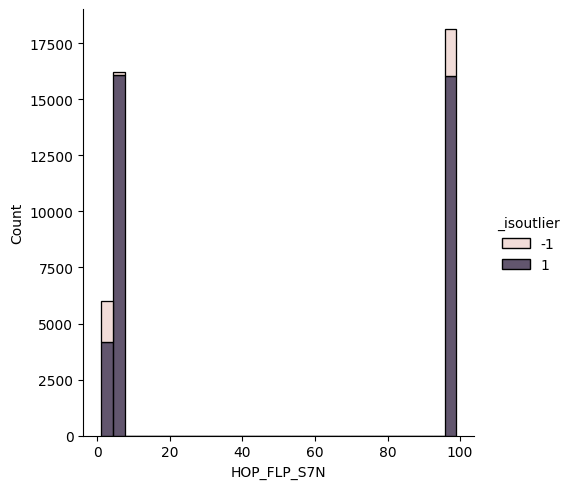

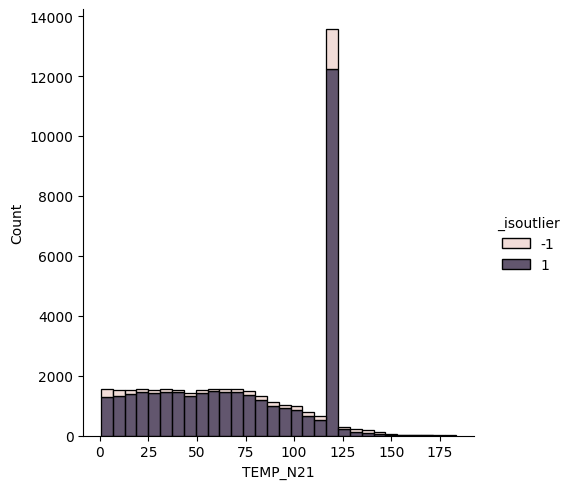

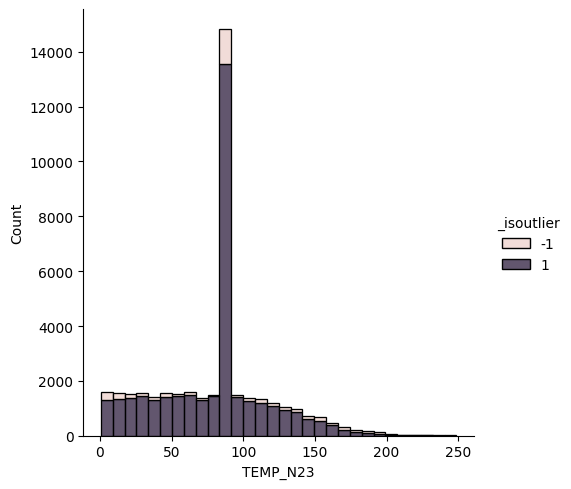

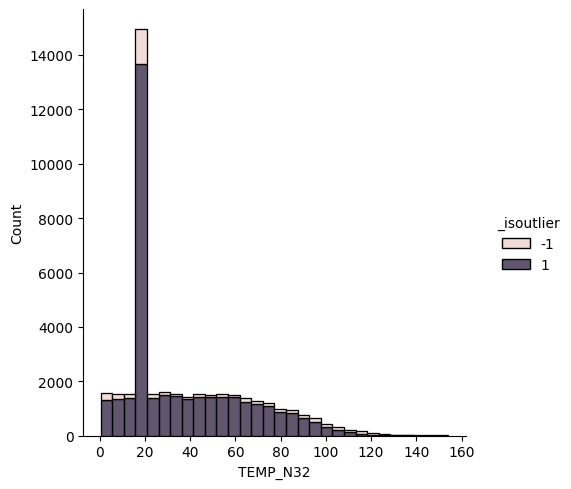

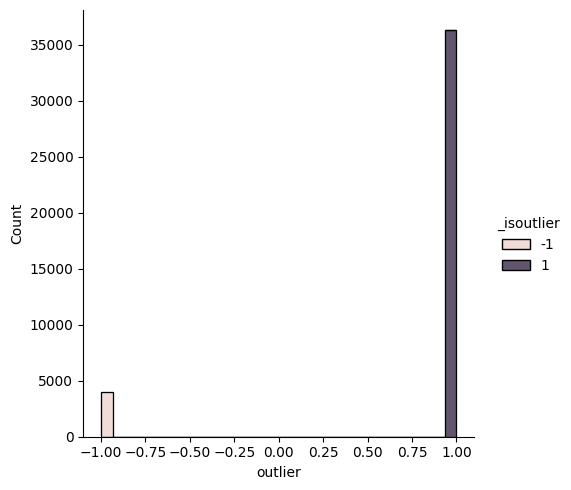

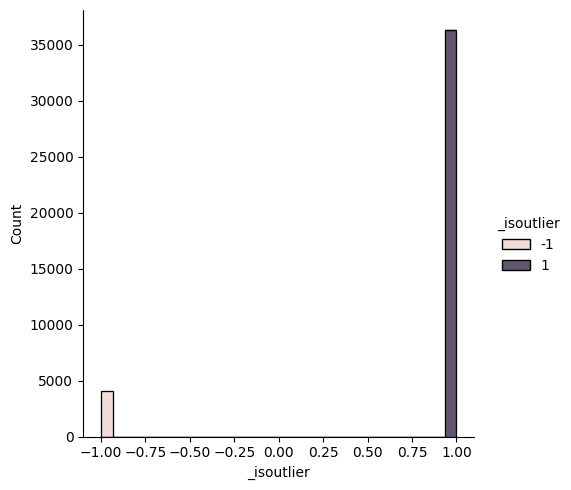

In [62]:
q1 = df_cleaned[list_numeric].quantile(0.25)
q3 = df_cleaned[list_numeric].quantile(0.75)
IQR = q3 - q1

df_cleaned["_isoutlier_q"] = ((df_cleaned.loc[:, list_numeric] < (q1 - 1.5 * IQR)) | (df_cleaned.loc[:, list_numeric] > (q3 + 1.5 * IQR))).sum(axis=1)
print(np.mean(df_cleaned["_isoutlier_q"]))

for k in list_numeric:
    sns.displot(data=df_cleaned, x=k, hue="_isoutlier", kind="hist", bins=30, multiple="stack")

# 3 RUL prediction
3.1 Utilisez pd.to_dumies pour 1-hot encoder les valeur categorielles.

In [65]:
# Identifier les colonnes catégorielles
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print(categorical_cols)
# Appliquer pd.get_dummies pour encoder les colonnes catégorielles
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

Index(['S34D_TMP_SN', 'S2D_PGHS_S1N', 'Company'], dtype='object')


3.2 Sélectionnez les features qui serviront à l'entrainement du model. Vous prendrez toutes les colonnes numériques de la dataFrame excepté "CYCLE". Calculez une colonne qui contient la RUL. Etudiez la distribution de la RUL. Commentez.

In [68]:
features = [col for col in df_encoded.select_dtypes("number").columns if col not in ["CYCLE", "AC_REG"]]
df_encoded["RUL"] = df_encoded["CYCLE"].copy()

for unit in df_encoded["AC_REG"].unique():
    tmp_df = df_encoded.loc[df_encoded["AC_REG"]==unit, "CYCLE"].copy()
    last_value = tmp_df.iloc[-1]
    indexes = df_encoded.loc[:, "AC_REG"]==unit
    all_value = np.array(tmp_df)
    df_encoded.loc[indexes, "RUL"] = all_value - last_value 

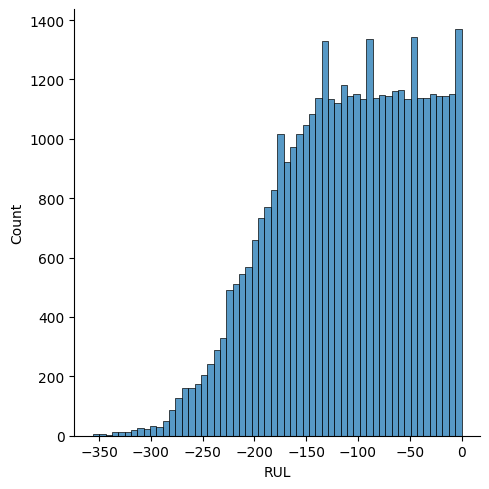

In [69]:
import seaborn as sns

sns.displot(df_encoded["RUL"])

3.3 Séparez votre dataset entre un jeu d'entrainement et de test. A votre avis, faut il faire particulierement attention à cette repartition ? Risquons nous de faire survenir des biais ? Apprenez un modèle linéaire sur toutes les données. (10'/1h55')

Mean Squared Error: 1825.2257356008595
R^2 Score: 0.6091608090598046


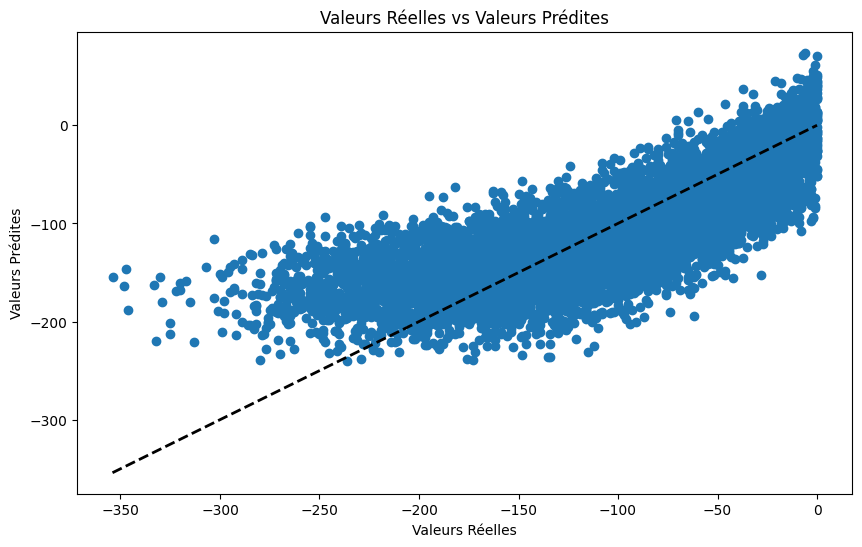

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélectionner les features et la target
X = df_encoded.drop(columns=['CYCLE', 'RUL'])
y = df_encoded['RUL']

# Séparer le dataset en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.show()

3.4 Etudiez la correlation entre les features numeriques et la RUL. Commentez.

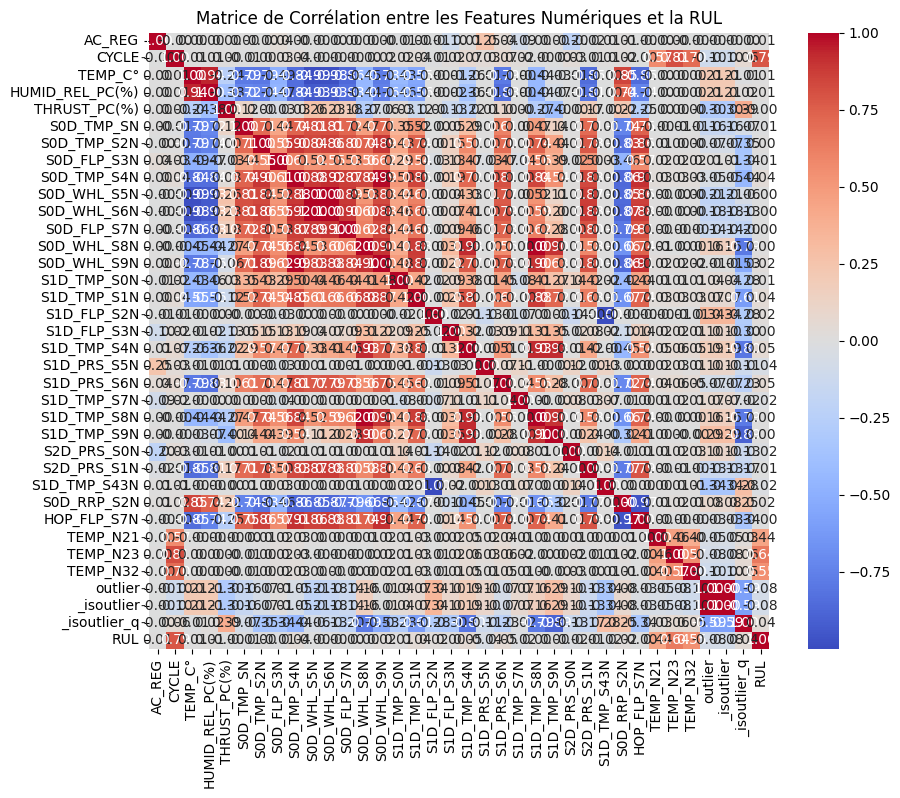

In [74]:
# Sélectionner les colonnes numériques
numeric_cols = df_encoded.select_dtypes(include=[np.number])
# Calculer la matrice de corrélation
correlation_matrix = numeric_cols.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation entre les Features Numériques et la RUL')
plt.show()

3.5 Faites de la sélection de features grâce à RFE. (Recursive Feature Elimination). Ne considerez que les valeurs numériques.

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [76]:
# Sélectionner les colonnes numériques excepté "CYCLE" et "RUL"
X = df_encoded.drop(columns=['CYCLE', 'RUL'])
y = df_encoded['RUL']

# Initialiser le modèle linéaire
model = LinearRegression()

# Initialiser RFE avec le modèle linéaire et le nombre de features à sélectionner
rfe = RFE(model, n_features_to_select=2)

# Ajuster RFE sur les données
rfe.fit(X, y)

# Afficher les features sélectionnées
selected_features = X.columns[rfe.support_]
print("Features sélectionnées par RFE :")
print(selected_features)

# Afficher le ranking des features
ranking = rfe.ranking_
print("Ranking des features :")
print(dict(zip(X.columns, ranking)))

Features sélectionnées par RFE :
Index(['HUMID_REL_PC(%)', 'S1D_PRS_S6N'], dtype='object')
Ranking des features :
{'AC_REG': 36, 'TEMP_C°': 9, 'HUMID_REL_PC(%)': 1, 'THRUST_PC(%)': 6, 'S0D_TMP_SN': 40, 'S0D_TMP_S2N': 33, 'S0D_FLP_S3N': 35, 'S0D_TMP_S4N': 17, 'S0D_WHL_S5N': 2, 'S0D_WHL_S6N': 3, 'S0D_FLP_S7N': 37, 'S0D_WHL_S8N': 7, 'S0D_WHL_S9N': 28, 'S1D_TMP_S0N': 12, 'S1D_TMP_S1N': 24, 'S1D_FLP_S2N': 38, 'S1D_FLP_S3N': 39, 'S1D_TMP_S4N': 29, 'S1D_PRS_S5N': 19, 'S1D_PRS_S6N': 1, 'S1D_TMP_S7N': 42, 'S1D_TMP_S8N': 8, 'S1D_TMP_S9N': 4, 'S2D_PRS_S0N': 41, 'S2D_PRS_S1N': 31, 'S1D_TMP_S43N': 16, 'S0D_RRP_S2N': 34, 'HOP_FLP_S7N': 5, 'TEMP_N21': 32, 'TEMP_N23': 27, 'TEMP_N32': 30, 'outlier': 21, '_isoutlier': 22, '_isoutlier_q': 23, 'S34D_TMP_SN_AAD': 11, 'S34D_TMP_SN_FLO': 13, 'S34D_TMP_SN_GGH': 14, 'S34D_TMP_SN_PPO': 10, 'S2D_PGHS_S1N_AAD': 15, 'S2D_PGHS_S1N_PPO': 18, 'Company_ANR': 25, 'Company_FOG': 26, 'Company_HGH': 20}


3.6 Apprenez un LASSO et comparez.

Mean Squared Error (LASSO): 1887.2529496773684
R^2 Score (LASSO): 0.5958787992277679
Coefficients du modèle LASSO :
{'AC_REG': 0.0035882000843898264, 'TEMP_C°': -11.76279642233411, 'HUMID_REL_PC(%)': 526.9242185529293, 'THRUST_PC(%)': 0.4109405094108935, 'S0D_TMP_SN': 0.009688378222308917, 'S0D_TMP_S2N': 0.05869563420966082, 'S0D_FLP_S3N': -0.02775795310633597, 'S0D_TMP_S4N': 2.8654896313247256, 'S0D_WHL_S5N': -51.82811573638271, 'S0D_WHL_S6N': -4.778719640131839, 'S0D_FLP_S7N': 0.007347069418271369, 'S0D_WHL_S8N': -1.257933942712665, 'S0D_WHL_S9N': 0.2390084708174025, 'S1D_TMP_S0N': -0.0, 'S1D_TMP_S1N': 0.9068839411685702, 'S1D_FLP_S2N': -0.00019532458580488323, 'S1D_FLP_S3N': -0.003385461482500124, 'S1D_TMP_S4N': 0.0815452739560452, 'S1D_PRS_S5N': -0.00019499083348934436, 'S1D_PRS_S6N': -0.0, 'S1D_TMP_S7N': -3.127124531574072e-05, 'S1D_TMP_S8N': -0.5954629118466873, 'S1D_TMP_S9N': 6.11909042576731, 'S2D_PRS_S0N': -0.00017688287782433498, 'S2D_PRS_S1N': 0.2535415151834104, 'S1D_TMP_S4

c:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.180e+07, tolerance: 1.519e+04
  model = cd_fast.enet_coordinate_descent(


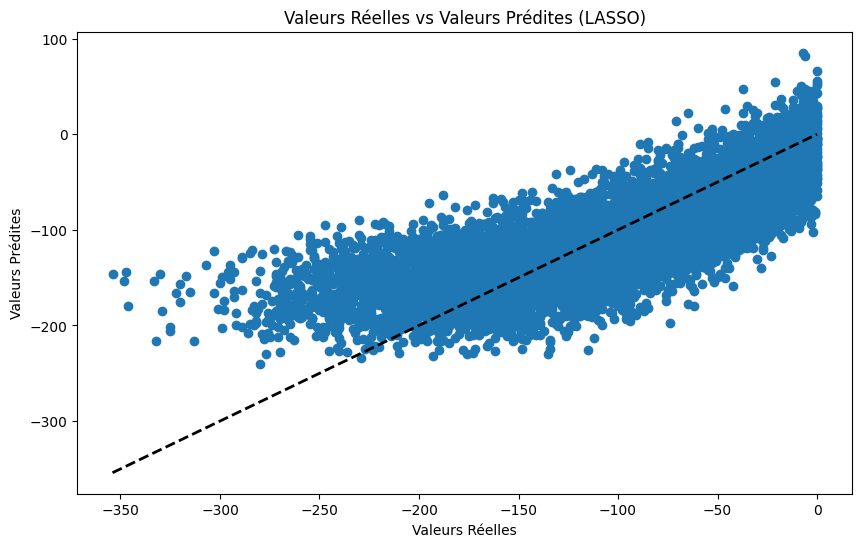

In [77]:
# Réponse
from sklearn.linear_model import Lasso

# Sélectionner les colonnes numériques excepté "CYCLE" et "RUL"
X = df_encoded.drop(columns=['CYCLE', 'RUL'])
y = df_encoded['RUL']

# Séparer le dataset en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred = lasso.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (LASSO): {mse}")
print(f"R^2 Score (LASSO): {r2}")

# Afficher les coefficients du modèle LASSO
print("Coefficients du modèle LASSO :")
print(dict(zip(X.columns, lasso.coef_)))

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites (LASSO)')
plt.show()

3.7 Plutôt que de supprimer les données manquantes, affectez la moyenne pour compléter les données. Refaites l'analyse de feature sélection, et comparez vos résultats.

Mean Squared Error (LASSO): 2302.4405392510866
R^2 Score (LASSO): 0.5082845534342051
Coefficients du modèle LASSO :
{'AC_REG': 0.011519392077541922, 'TEMP_C°': -0.7100895292312912, 'HUMID_REL_PC(%)': 88.41904024903678, 'THRUST_PC(%)': -0.18969584568911743, 'S0D_TMP_SN': -0.03349670084519321, 'S0D_TMP_S2N': -0.0070660311885341, 'S0D_FLP_S3N': -0.025863183134944612, 'S0D_TMP_S4N': 0.6329960289158386, 'S0D_WHL_S5N': -1.255952706202747, 'S0D_WHL_S6N': -0.3757451756240822, 'S0D_FLP_S7N': -0.004674350829326975, 'S0D_WHL_S8N': -0.21325256917649046, 'S0D_WHL_S9N': -0.012373518596004501, 'S1D_TMP_S0N': 0.0, 'S1D_TMP_S1N': 1.1467411083811079, 'S1D_FLP_S2N': 3.7541189572765145e-05, 'S1D_FLP_S3N': -0.00233763605226473, 'S1D_TMP_S4N': 0.12115604593898203, 'S1D_PRS_S5N': -9.937627717623198e-05, 'S1D_PRS_S6N': 0.0, 'S1D_TMP_S7N': -3.16221388060525e-05, 'S1D_TMP_S8N': -0.04782841199326682, 'S1D_TMP_S9N': -1.0048641253052941, 'S2D_PRS_S0N': -5.9204189223171756e-05, 'S2D_PRS_S1N': -0.035547837236080904,

c:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.149e+06, tolerance: 1.719e+04
  model = cd_fast.enet_coordinate_descent(


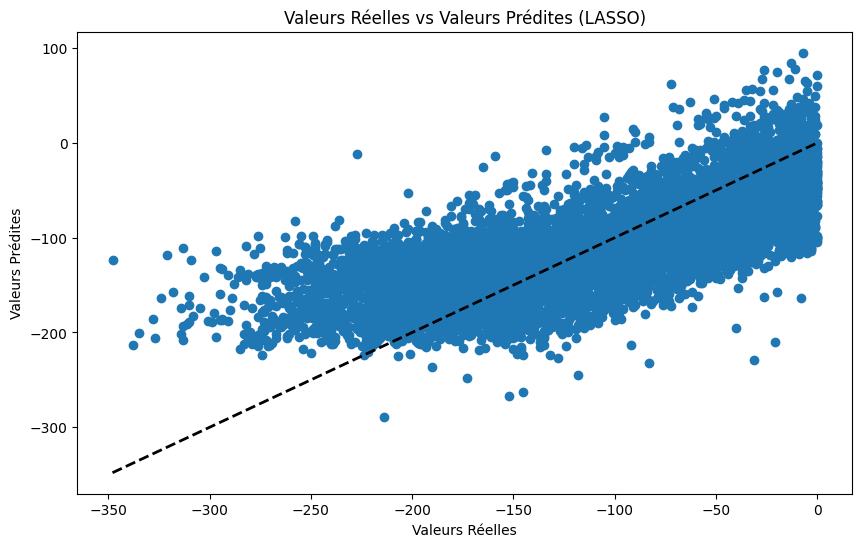

In [83]:
# Réponse
from sklearn.linear_model import Lasso

# Compléter les données manquantes avec la moyenne pour les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Effectuer un one-hot encoding pour les colonnes de type object
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)



for unit in df_encoded["AC_REG"].unique():
    tmp_df = df_encoded.loc[df_encoded["AC_REG"]==unit, "CYCLE"].copy()
    last_value = tmp_df.iloc[-1]
    indexes = df_encoded.loc[:, "AC_REG"]==unit
    all_value = np.array(tmp_df)
    df_encoded.loc[indexes, "RUL"] = all_value - last_value 

# Sélectionner les colonnes numériques excepté "CYCLE" et "RUL"
X = df_encoded.drop(columns=['CYCLE', 'RUL'])
y = df_encoded['RUL']

# Séparer le dataset en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred = lasso.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (LASSO): {mse}")
print(f"R^2 Score (LASSO): {r2}")

# Afficher les coefficients du modèle LASSO
print("Coefficients du modèle LASSO :")
print(dict(zip(X.columns, lasso.coef_)))

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Réelles vs Valeurs Prédites (LASSO)')
plt.show()

# 4. Recurrent Deep Survival Machine
Dans cette partie nous allons utiliser l'architecture RDSM.

In [ ]:
from google.colab import files
uploaded = files.upload() ### sélectionner auton_survival.zip

In [85]:
!unzip auton_survival

'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [86]:
!pip install scikit-survival
# pensez à redémarrer


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%load_ext autoreload
%autoreload 2
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sys.path.append('/content/')
sys.path.append('/content/auton_survival')
sys.path.append('/content/auton_survival/auton_survival/')
# Pensez à redémarrer le kernel (une seconde fois)

In [3]:
from auton_survival import datasets

outcomes, features = datasets.load_support()
x, t, e = datasets.load_dataset('PBC', sequential = True)

ImportError: cannot import name 'datasets' from 'auton_survival' (unknown location)

$x$ est une liste qui contient des séries temporelles de 25 variables. $t$ est le temps avant événement ou avant censure, et $e$ l'indicateur de censure.

In [ ]:
selected_unit = 3
plt.figure()
plt.plot(-t[selected_unit], x[selected_unit],'--d');

Nous montrons ici quelques graphes informatifs sur le dataset.

In [ ]:
names = ['Penicillin',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema despite diuretics',
 'Edema no diuretics',
 'histologic 2',
 'histologic 3',
 'histologic 4',
 'serBilir',
 'serChol',
 'albumin',
 'alkaline',
 'SGOT',
 'platelets',
 'prothrombin',
 'age']
FlattenDataSet = pd.DataFrame(np.concatenate(x), columns=names)
index_list = []
for idx, individual in enumerate(x):
    index_list.append(idx * np.ones(len(individual)))

FlattenDataSet['Index'] = np.concatenate(index_list)

FlattenTime = pd.DataFrame(np.concatenate(t))

In [ ]:
plt.figure(figsize=(20, 20))
for idp, k in enumerate(FlattenDataSet.keys()):
    plt.subplot(5, 5, idp+1)
    plt.plot(np.sort(FlattenDataSet[k].unique()),'d')
    plt.xlabel(k)
plt.tight_layout;

plt.figure(figsize=(20, 20))
for idp, k in enumerate(FlattenDataSet.keys()):
    plt.subplot(5, 5, idp+1)
    sns.histplot(FlattenDataSet[k])
    plt.xlabel(k)
plt.tight_layout;

In [ ]:
# On calculera le brier score intégré avec les quantiles 0.25, 0.5, et 0.75
horizons = [0.25, 0.5, 0.75]
times = np.quantile(FlattenTime, horizons).tolist()


4.1 Faites quelques visualisations des temps avant événement sur le dataset. Un commentaire ?

In [ ]:
# Votre réponse

4.2 Couper votre dataset en train / test / split.

In [ ]:
# Votre réponse

4.3 Comparez deux architectures identiques de DSM entre lognormal & weibull.

In [ ]:
from auton_survival.models.dsm import DeepRecurrentSurvivalMachines
# Votre réponse